# Natural language processing (NLP) 

### ¿Qué es la NLP? Es una tecnología de machine learning que brinda a las computadoras la capacidad de interpretar, manipular y comprender el lenguaje humano.

In [1]:
# Librerias para cargar y mostrar imagenes
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Aplicaciones del NLP 
### -Resumir texto
### -Crear chatbots
### -Generar etiquetas de palabras claves
### -Reconocer entidades
### -Analisis de sentimientos

# Librerias NLP
### -NLTK
### -Spacy
### -TextTacy

In [2]:
# Importamos las librerias necesarias para la manipulación de la data
import pandas as pd
pd.set_option('max_colwidth',150)
import numpy as np
import pickle
import re
import string
import pprint
pp = pprint.PrettyPrinter(compact=True)
import unidecode
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations
from scipy.spatial.distance import cdist

# Importamos la libreria sklearn necesaria para el analisis y modelamiento
from sklearn.feature_extraction.text import CountVectorizer # sirve para contar cuantas veces se repite una palabra en un texto
from sklearn.feature_extraction.text import TfidfVectorizer # tokeniza documentos

# Importamos la libreria nltk necesaria para el analisis de textos
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
regexp = RegexpTokenizer('\w+')

# Solo una unica vez se descargan los stopwords
# nltk.download('stopwords')

#Importamos librerias para procesar fechas
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta
import time

#Guardamos la hora inicial del proceso
start = time.time()

#Creamos un formato de fecha
formato_fecha = "%d/%m/%Y"
FECHA_CARGA=datetime.now().strftime(formato_fecha)

## 1-Reading the file

In [3]:
# Lectura de datos
# ==============================================================================
df_DAM_PROVEEDORES = pd.read_table("C:/Users/LEGION Y540/TEXT MINING/data_pruebaDGRA/ALL_PARTICIPANTE_93.txt", encoding='unicode_escape',
                            sep='©', index_col=False)

C:\Users\LEGION Y540\AppData\Local\Temp\ipykernel_3868\3274212492.py:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df_DAM_PROVEEDORES = pd.read_table("C:/Users/LEGION Y540/TEXT MINING/data_pruebaDGRA/ALL_PARTICIPANTE_93.txt", encoding='unicode_escape',


In [4]:
# Lectura de datos
# ==============================================================================
df_DAM_EMBARCADORES = pd.read_csv("C:/Users/LEGION Y540/TEXT MINING/data_pruebaDGRA/EMBARCADORES/ALL_Embarcadores_2018_2023.csv", encoding='utf-8', 
                              on_bad_lines='skip', sep='©')

C:\Users\LEGION Y540\AppData\Local\Temp\ipykernel_3868\2026730382.py:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df_DAM_EMBARCADORES = pd.read_csv("C:/Users/LEGION Y540/TEXT MINING/data_pruebaDGRA/EMBARCADORES/ALL_Embarcadores_2018_2023.csv", encoding='utf-8',


In [5]:
df_DAM_PROVEEDORES.columns

Index(['NUM_CORREDOC', 'NUM_SECPARTIC', 'CODI_PAIS', 'NOM_PROVE', 'FEC_REGIS'], dtype='object')

In [6]:
df_DAM_EMBARCADORES.columns

Index(['NUM_CORREDOC', 'NUM_SECPARTIC', 'COD_PAIS', 'COD_TIPPARTIC',
       'NOM_RAZONSOCIAL'],
      dtype='object')

In [7]:
df_DAM_EMBARCADORES.rename(columns = {'COD_PAIS':'CODI_PAIS'}, inplace = True)
df_DAM_EMBARCADORES.rename(columns = {'NOM_RAZONSOCIAL':'NOM_PROVE'}, inplace = True)

In [8]:
df_DAM_PROVEEDORES['COD_TIPPARTIC']='93'

In [9]:
df_DAM_PROVEEDORES = df_DAM_PROVEEDORES.loc[:,['NUM_CORREDOC','NUM_SECPARTIC','CODI_PAIS','NOM_PROVE','COD_TIPPARTIC']]

In [10]:
df_DAM_EMBARCADORES = df_DAM_EMBARCADORES.loc[:,['NUM_CORREDOC','NUM_SECPARTIC','CODI_PAIS','NOM_PROVE','COD_TIPPARTIC']]

In [11]:
df_DAM_PROVEEDORES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082887 entries, 0 to 4082886
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   NUM_CORREDOC   int64 
 1   NUM_SECPARTIC  int64 
 2   CODI_PAIS      object
 3   NOM_PROVE      object
 4   COD_TIPPARTIC  object
dtypes: int64(2), object(3)
memory usage: 155.7+ MB


In [12]:
df_DAM_EMBARCADORES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520791 entries, 0 to 2520790
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   NUM_CORREDOC   int64 
 1   NUM_SECPARTIC  int64 
 2   CODI_PAIS      object
 3   NOM_PROVE      object
 4   COD_TIPPARTIC  object
dtypes: int64(2), object(3)
memory usage: 96.2+ MB


In [13]:
df_DAM_PROVEEDOR = pd.concat([df_DAM_PROVEEDORES,df_DAM_EMBARCADORES])

In [14]:
df_DAM_PROVEEDOR.sample(6)

,NUM_CORREDOC,NUM_SECPARTIC,CODI_PAIS,NOM_PROVE,COD_TIPPARTIC
2079151,16572268,68857262,AR,SUPERCONTROLS S.A.,93
2416776,20252050,85836476,CN,CHERY COMMERCIAL VEHICLE(ANHUI) COMPANY LIMITED,93
1747374,7254174,34419966,US,EGL,SF
2082656,12027994,52548842,CN,TANGSHAN IRON AND STEEL GROUP CO.LTD.,SF
2763213,24347788,103616553,US,"ACRO BIOTECH, INC",93
3986595,39148912,182760401,UY,VELCROINDUSTRIAL DEL URUGUAY S.A.,93


In [15]:
# Información de la data cargada
df_DAM_PROVEEDOR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603678 entries, 0 to 2520790
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   NUM_CORREDOC   int64 
 1   NUM_SECPARTIC  int64 
 2   CODI_PAIS      object
 3   NOM_PROVE      object
 4   COD_TIPPARTIC  object
dtypes: int64(2), object(3)
memory usage: 302.3+ MB


In [16]:
# Porcentaje de columnas con valores perdidos
(df_DAM_PROVEEDOR.isnull().sum() / len(df_DAM_PROVEEDOR))*100

NUM_CORREDOC     0.000000
NUM_SECPARTIC    0.000000
CODI_PAIS        0.000045
NOM_PROVE        0.001666
COD_TIPPARTIC    0.000000
dtype: float64

In [17]:
# Rellenamos los casos vacios con XX
df_DAM_PROVEEDOR = df_DAM_PROVEEDOR.fillna('XX')

In [18]:
# Comprobando que no existen valores perdidos
(df_DAM_PROVEEDOR.isnull().sum() / len(df_DAM_PROVEEDOR))*100

NUM_CORREDOC     0.0
NUM_SECPARTIC    0.0
CODI_PAIS        0.0
NOM_PROVE        0.0
COD_TIPPARTIC    0.0
dtype: float64

In [19]:
# Hacemos una copia de la tabla PROVEEDOR con el objetivo de no modificar la tabla PROVEEDOR
paises=df_DAM_PROVEEDOR.copy()

In [20]:
# Cambiamos a tipo string las columnas que pasaran por el procesos de Mineria de Textos
paises['COD_PAISORIGEN_PE'] = paises['CODI_PAIS'].astype(str)

In [21]:
# Funcion para pasar a mayuscula los paises
def clean_text_r0(text):
    text = text.upper()
    return text
clean_r0 = lambda x : clean_text_r0(x)

In [22]:
# Se ejecuta la función
paises = pd.DataFrame(paises.CODI_PAIS.apply(clean_r0))
paises

,CODI_PAIS
0,CL
1,CN
2,CN
3,KR
4,HK
...,...
2520786,US
2520787,PA
2520788,PA
2520789,CL


In [23]:
df_DAM_PROVEEDOR.drop(['CODI_PAIS'], axis=1)

,NUM_CORREDOC,NUM_SECPARTIC,NOM_PROVE,COD_TIPPARTIC
0,5926937,29924516,FORESTAL SANTA BLANCA S.A.,93
1,5926941,29924532,NINGBO SEDUNO IMP & EXP CO.LTD,93
2,5926941,29924536,"CHINA-BASE NINGBO FOREIGN TRADE CO. LTD,",93
3,5926934,29924499,HYUNDAI MOTOR COMPANY,93
4,5926941,29924540,QUART INTERNATIONAL COMPANY LIMITED,93
...,...,...,...,...
2520786,39256222,184083514,THE FRUITIST COMPANY,SF
2520787,39256222,184106778,SEA CARGO SA,SF
2520788,39256222,184106698,SEA CARGO SA,SF
2520789,39146356,182747300,COMPAÑÍA SIDERURGICA HUACHIPATO S.A.,SF


In [24]:
df_DAM_PROVEEDOR['CODI_PAIS'] = paises

In [25]:
df_DAM_PROVEEDOR

,NUM_CORREDOC,NUM_SECPARTIC,CODI_PAIS,NOM_PROVE,COD_TIPPARTIC
0,5926937,29924516,CL,FORESTAL SANTA BLANCA S.A.,93
1,5926941,29924532,CN,NINGBO SEDUNO IMP & EXP CO.LTD,93
2,5926941,29924536,CN,"CHINA-BASE NINGBO FOREIGN TRADE CO. LTD,",93
3,5926934,29924499,KR,HYUNDAI MOTOR COMPANY,93
4,5926941,29924540,HK,QUART INTERNATIONAL COMPANY LIMITED,93
...,...,...,...,...,...
2520786,39256222,184083514,US,THE FRUITIST COMPANY,SF
2520787,39256222,184106778,PA,SEA CARGO SA,SF
2520788,39256222,184106698,PA,SEA CARGO SA,SF
2520789,39146356,182747300,CL,COMPAÑÍA SIDERURGICA HUACHIPATO S.A.,SF


In [26]:
# Hacemos una copia de la tabla PROVEEDOR con el objetivo de no modificar la tabla PROVEEDOR
sumillas=df_DAM_PROVEEDOR.copy()

In [27]:
# Información de la data modificada
sumillas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603678 entries, 0 to 2520790
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   NUM_CORREDOC   int64 
 1   NUM_SECPARTIC  int64 
 2   CODI_PAIS      object
 3   NOM_PROVE      object
 4   COD_TIPPARTIC  object
dtypes: int64(2), object(3)
memory usage: 302.3+ MB


In [28]:
# Cambiamos a tipo string las columnas que pasaran por el procesos de Mineria de Textos
sumillas['NOM_RAZONSOCIAL_PE'] = sumillas['NOM_PROVE'].astype(str)
sumillas['COD_PAISORIGEN_PE'] = sumillas['CODI_PAIS'].astype(str)

## 2-Cleaning data

### Eliminar signos de puntuación y palabras con dígitos

In [29]:
# re — Operaciones con expresiones regulares

In [30]:
# Funcion para limpiar los caracteres de puntuación
def clean_text_r1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation+'¡¿«»¬'), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = unidecode.unidecode(text) #reemplaza caracteres á,é,í, entre otros
    return text
clean_r1 = lambda x : clean_text_r1(x)

In [31]:
# Se ejecuta la función para la Razon Social del Proveedor
sumillas_clean = pd.DataFrame(sumillas.NOM_RAZONSOCIAL_PE.apply(clean_r1))
sumillas_clean

,NOM_RAZONSOCIAL_PE
0,forestal santa blanca sa
1,ningbo seduno imp exp coltd
2,chinabase ningbo foreign trade co ltd
3,hyundai motor company
4,quart international company limited
...,...
2520786,the fruitist company
2520787,sea cargo sa
2520788,sea cargo sa
2520789,compania siderurgica huachipato sa


### Checking the clean job / printing a character dictionary

In [32]:
# Checking the clean job / printing a character dictionary
set_characters = set()
for sumilla in sumillas_clean.NOM_RAZONSOCIAL_PE.values:
    for character in sumilla:
        set_characters.add(character)
pp.pprint(set_characters)

{' ', '"', '$', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2',
 '3', '4', '<', '=', '?', 'C', 'E', 'P', 'R', 'S', 'U', 'Y', '^', 'a', 'b', 'c',
 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '\x7f'}


In [33]:
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '\x80' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '\x81' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '\x82' in x )]
sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '*' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '\xa0' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : 'ª' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '¼' in x )]

,NOM_RAZONSOCIAL_PE
207868,vsm * vereinigte schmirgel und maschinenfabriken ag
303497,ellwood nat*l cs service
405687,gamma piu* srl
545788,wikussagenfabrik * wilhelm h kullmann gmgh cokg
931760,gamma piu* srl
966915,vsm * vereinigte schmirgel und maschinenfabriken ag
1129799,wikussagenfabrik * wilhelm h kullmann gmgh cokg
1505508,wikussagenfabrik * wilhelm h kullmann gmgh cokg
1791619,vsm * vereinigte schmirgel und maschinenfabriken ag
1798325,vsm * vereinigte schmirgel und maschinenfabriken ag


### Eliminar strange characters

In [34]:
# Eliminar other strange characters
strange_chars = ['\x80', '\x81', '$', '%', '*', '+', ',', '.', '/', 
'<', '?', '^',  '|', '~', '\x7f', 
'\x83', '\x84', '\x87', '\x88', '\x89', '\x8a', '\x8d', '\x91', '\x92', '\x93','\xad','\x95','\xad','*',
                 '\x95', '\x96', '\x99', '\x9a', '\x9c', '\x9d', '\x9e', '\xa0','ª', 'þ','£','¤','¼','½','³','§','°','–','’'
                ]
# Funcion para eliminar strange character
def clean_text_r2(text):
    for sc in strange_chars:
        text = re.sub('\w*\{}\w*'.format(sc), '', text)
        text = text.replace(sc, '')
    return text.strip()
clean_r2 = lambda x : clean_text_r2(x)

In [35]:
# Se ejecuta la función para la Razon Social del Proveedor
sumillas_clean = pd.DataFrame(sumillas_clean.NOM_RAZONSOCIAL_PE.apply(clean_r2))
sumillas_clean

,NOM_RAZONSOCIAL_PE
0,forestal santa blanca sa
1,ningbo seduno imp exp coltd
2,chinabase ningbo foreign trade co ltd
3,hyundai motor company
4,quart international company limited
...,...
2520786,the fruitist company
2520787,sea cargo sa
2520788,sea cargo sa
2520789,compania siderurgica huachipato sa


In [36]:
# Corroboramos que ya no aparece el *
sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '*' in x )]

,NOM_RAZONSOCIAL_PE


### Checking the clean job / printing a character dictionary

In [37]:
# Checking the clean job / printing a character dictionary
set_characters = set()
for sumilla in sumillas_clean.NOM_RAZONSOCIAL_PE.values:
    for character in sumilla:
        set_characters.add(character)
pp.pprint(set_characters)

{' ', '"', "'", '(', ')', '-', '2', '3', '=', 'E', 'P', 'R', 'S', 'U', 'Y', 'a',
 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q',
 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'}


In [38]:
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '®' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '¥' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '¨' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '´' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '·' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : 'à' in x )]
#sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : 'â' in x )]
sumillas_clean[sumillas_clean.NOM_RAZONSOCIAL_PE.apply(lambda x : '=' in x )]

,NOM_RAZONSOCIAL_PE
1131907,conferencia episcopal espaY=ola
1590970,industria de diseY=o textil sa
2739171,proveedora montaY=esa de cordeleria sl
2973492,proveedora montaY=esa de cordeleria sl


### Reemplazar strange characters

In [39]:
# Reemplazamos extraños caracteres segun criterio del analista
replace_chars = {'®':' ','¥':'ñ','¨':'','º':'','·':'','¢':'a','©':'e','±':'ñ','µ':'','¶':'','"':'',"''":'',
                 'E':'e', 'P':'p', 'R':'r', 'S':'s', 'U':'u','2':'', '3':'','Y':'y',
                 'á':'a','à':'a','â':'a','ã':'a','ä':'a','ç':'c','è':'e','é':'e','ê':'e','´':'','œ':'s',
                  '*':'', '+':'', '-':'', '=':'','|':'',"'":'','(':'',')':'',
            'í':'i','ó':'o', 'õ':'o','ö':'o','ú':'u','ü':'u','ý':'y','¦':'','ÿ':'y'}
replace_words = {'artãculo':'artículo','producciãn':'producción','inda°stria':'industria',
                 'tãcnica':'técnica','gestãon':'gestión','gestiãn':'gestión',
                 'secretarãa':'secretaría', 'implementaciãn':'implementación',
                 'ãmbito':'ámbito'}
# Funcion para reemplazar strange character
def clean_text_r3(text):
    for rp in replace_chars.keys():
        text = text.replace(rp, replace_chars[rp])
    for rp in replace_words.keys():
        text = text.replace(rp, replace_words[rp])
    return text.strip()
clean_r3 = lambda x : clean_text_r3(x)

In [40]:
# Se ejecuta la función para la Razon Social del Proveedor
sumillas_clean = pd.DataFrame(sumillas_clean.NOM_RAZONSOCIAL_PE.apply(clean_r3))
sumillas_clean

,NOM_RAZONSOCIAL_PE
0,forestal santa blanca sa
1,ningbo seduno imp exp coltd
2,chinabase ningbo foreign trade co ltd
3,hyundai motor company
4,quart international company limited
...,...
2520786,the fruitist company
2520787,sea cargo sa
2520788,sea cargo sa
2520789,compania siderurgica huachipato sa


In [41]:
# Se muestran algunos casos para verificar los resultados
sumillas_clean[np.isin(sumillas_clean.index, [158216, 158217])]

,NOM_RAZONSOCIAL_PE
158216,kenda rubber china co ltd
158217,hyundai motor india ltd
158216,inovyn europe limited
158217,dhl global forwarding sweden ab


### Checking the clean job / printing a character dictionary

In [42]:
# Checking the clean job / printing a character dictionary
set_characters = set()
for sumilla in sumillas_clean.NOM_RAZONSOCIAL_PE.values:
    for character in sumilla:
        set_characters.add(character)
pp.pprint(set_characters)

{' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'}


## 3-Libreria NLTK
### El Natural Language Toolkit (NLTK) es una plataforma usada para construir programas para análisis de texto. La plataforma fue liberada originalmente por Steven Bird y Edward Loper en conjunto con un curso de lingüística computacional en la Universidad de Pennsylvania en 2001

In [43]:
# dataset limpio de caracteres especiales y signos de puntuación
sumillas_clean

,NOM_RAZONSOCIAL_PE
0,forestal santa blanca sa
1,ningbo seduno imp exp coltd
2,chinabase ningbo foreign trade co ltd
3,hyundai motor company
4,quart international company limited
...,...
2520786,the fruitist company
2520787,sea cargo sa
2520788,sea cargo sa
2520789,compania siderurgica huachipato sa


### Tokenizando

In [44]:
# Al tokenizar hacemos que cada palabra del texto se convierta en un elemento de una lista
sumillas_clean['NOM_RAZONSOCIAL_PE_token']=sumillas_clean['NOM_RAZONSOCIAL_PE'].apply(regexp.tokenize)

In [45]:
sumillas_clean

,NOM_RAZONSOCIAL_PE,NOM_RAZONSOCIAL_PE_token
0,forestal santa blanca sa,"[forestal, santa, blanca, sa]"
1,ningbo seduno imp exp coltd,"[ningbo, seduno, imp, exp, coltd]"
2,chinabase ningbo foreign trade co ltd,"[chinabase, ningbo, foreign, trade, co, ltd]"
3,hyundai motor company,"[hyundai, motor, company]"
4,quart international company limited,"[quart, international, company, limited]"
...,...,...
2520786,the fruitist company,"[the, fruitist, company]"
2520787,sea cargo sa,"[sea, cargo, sa]"
2520788,sea cargo sa,"[sea, cargo, sa]"
2520789,compania siderurgica huachipato sa,"[compania, siderurgica, huachipato, sa]"


### Analizando Stopwords

In [46]:
# Agregamos la columna tokenizada al dataset
sumillas_stopwords = pd.concat([sumillas, sumillas_clean], axis=1)

In [47]:
sumillas_stopwords

,NUM_CORREDOC,NUM_SECPARTIC,CODI_PAIS,NOM_PROVE,COD_TIPPARTIC,NOM_RAZONSOCIAL_PE,COD_PAISORIGEN_PE,NOM_RAZONSOCIAL_PE,NOM_RAZONSOCIAL_PE_token
0,5926937,29924516,CL,FORESTAL SANTA BLANCA S.A.,93,FORESTAL SANTA BLANCA S.A.,CL,forestal santa blanca sa,"[forestal, santa, blanca, sa]"
1,5926941,29924532,CN,NINGBO SEDUNO IMP & EXP CO.LTD,93,NINGBO SEDUNO IMP & EXP CO.LTD,CN,ningbo seduno imp exp coltd,"[ningbo, seduno, imp, exp, coltd]"
2,5926941,29924536,CN,"CHINA-BASE NINGBO FOREIGN TRADE CO. LTD,",93,"CHINA-BASE NINGBO FOREIGN TRADE CO. LTD,",CN,chinabase ningbo foreign trade co ltd,"[chinabase, ningbo, foreign, trade, co, ltd]"
3,5926934,29924499,KR,HYUNDAI MOTOR COMPANY,93,HYUNDAI MOTOR COMPANY,KR,hyundai motor company,"[hyundai, motor, company]"
4,5926941,29924540,HK,QUART INTERNATIONAL COMPANY LIMITED,93,QUART INTERNATIONAL COMPANY LIMITED,HK,quart international company limited,"[quart, international, company, limited]"
...,...,...,...,...,...,...,...,...,...
2520786,39256222,184083514,US,THE FRUITIST COMPANY,SF,THE FRUITIST COMPANY,US,the fruitist company,"[the, fruitist, company]"
2520787,39256222,184106778,PA,SEA CARGO SA,SF,SEA CARGO SA,PA,sea cargo sa,"[sea, cargo, sa]"
2520788,39256222,184106698,PA,SEA CARGO SA,SF,SEA CARGO SA,PA,sea cargo sa,"[sea, cargo, sa]"
2520789,39146356,182747300,CL,COMPAÑÍA SIDERURGICA HUACHIPATO S.A.,SF,COMPAÑÍA SIDERURGICA HUACHIPATO S.A.,CL,compania siderurgica huachipato sa,"[compania, siderurgica, huachipato, sa]"


In [48]:
# Filtamos solo la columnas necesarias
sumillas_stopwords = sumillas_stopwords.iloc[:,5:8]

In [49]:
# Observamos la frecuencia de cada pais
sumillas_stopwords['COD_PAISORIGEN_PE'].value_counts().head(12)

CN    1853121
US     957063
BR     359083
CL     293690
CO     236006
MX     235425
HK     226191
KR     216914
DE     214755
ES     170077
JP     169850
IN     157453
Name: COD_PAISORIGEN_PE, dtype: int64

In [50]:
# Filtramos el pais MX para observar resultados y buscar posibles stopwords para agregarlos a lista. 
# Lo mismo se hace con distintos paises. El objetivo es tener una lista de stopwords
sumillas_filtro=sumillas_stopwords[sumillas_stopwords['COD_PAISORIGEN_PE']=='MX']

In [51]:
sumillas_filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235425 entries, 8 to 2520166
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   NOM_RAZONSOCIAL_PE  235425 non-null  object
 1   COD_PAISORIGEN_PE   235425 non-null  object
 2   NOM_RAZONSOCIAL_PE  235425 non-null  object
dtypes: object(3)
memory usage: 7.2+ MB


In [52]:
sumillas_filtro.columns

Index(['NOM_RAZONSOCIAL_PE', 'COD_PAISORIGEN_PE', 'NOM_RAZONSOCIAL_PE'], dtype='object')

In [53]:
# En este ejemplo las abreviaturas "sa" y "cv" son posibles stopwords
sumillas_filtro

,NOM_RAZONSOCIAL_PE,COD_PAISORIGEN_PE,NOM_RAZONSOCIAL_PE
8,VOLKSWAGEN DE MEXICO S.A. DE C.V.,MX,volkswagen de mexico sa de cv
70,MEDIDORES INTERNACIONALES ROCHESTER S.A. DE C.V.,MX,medidores internacionales rochester sa de cv
72,"MEXICHEM SOLUCIONES INTEGRALES HOLDING, S.A. DE C.V.",MX,mexichem soluciones integrales holding sa de cv
92,NISSAN MEXICANA S.A. DE C.V.,MX,nissan mexicana sa de cv
329,DONGBU DAEWOO ELECTRONICS HOME APPLIANCE DE MEXICO S.A. DE C,MX,dongbu daewoo electronics home appliance de mexico sa de c
...,...,...,...
2520045,"LG ELECTRONICS REYNOSA, S.A. DE C.V.",MX,lg electronics reynosa sa de cv
2520055,COMPANIA CERVECERA DE ZACATECAS S. DE R.L. DE C.V.,MX,compania cervecera de zacatecas s de rl de cv
2520164,"PROCTER & GAMBLE MANUFACTURING MEXICO, S DE RL DE CV ON BEHALF OF",MX,procter gamble manufacturing mexico s de rl de cv on behalf of
2520165,"PROCTER & GAMBLE MANUFACTURING MEXICO, S DE RL DE CV ON BEHALF OF",MX,procter gamble manufacturing mexico s de rl de cv on behalf of


### Stopwords en español, ingles y portugues

### Make a list of spanish stopwords

In [54]:
# Make a list of spanish stopwords
stopwords = nltk.corpus.stopwords.words("spanish")
# Extend the list with your own custom stopwords
my_stopwords = ['https','ltd','co','sa','sac','coltd','cltd','sas','s','rl','fa','sau','slu','do','e', 'bv', 'imp', 'exp',
                'import', 'export']
stopwords.extend(my_stopwords)
print(stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [55]:
# Remove stopwords
sumillas_clean['NOM_RAZONSOCIAL_PE_token'] = sumillas_clean['NOM_RAZONSOCIAL_PE_token'].apply(lambda x: [item for item in x if item not in stopwords])
sumillas_clean

,NOM_RAZONSOCIAL_PE,NOM_RAZONSOCIAL_PE_token
0,forestal santa blanca sa,"[forestal, santa, blanca]"
1,ningbo seduno imp exp coltd,"[ningbo, seduno]"
2,chinabase ningbo foreign trade co ltd,"[chinabase, ningbo, foreign, trade]"
3,hyundai motor company,"[hyundai, motor, company]"
4,quart international company limited,"[quart, international, company, limited]"
...,...,...
2520786,the fruitist company,"[the, fruitist, company]"
2520787,sea cargo sa,[cargo]
2520788,sea cargo sa,[cargo]
2520789,compania siderurgica huachipato sa,"[compania, siderurgica, huachipato]"


### Make a list of english stopwords

In [56]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")
# Extend the list with your own custom stopwords
my_stopwords = ['https','inc','limited','cv','ltda','sl','llc','corp','ag','hk']
stopwords.extend(my_stopwords)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
# Remove stopwords
sumillas_clean['NOM_RAZONSOCIAL_PE_token'] = sumillas_clean['NOM_RAZONSOCIAL_PE_token'].apply(lambda x: [item for item in x if item not in stopwords])
sumillas_clean

,NOM_RAZONSOCIAL_PE,NOM_RAZONSOCIAL_PE_token
0,forestal santa blanca sa,"[forestal, santa, blanca]"
1,ningbo seduno imp exp coltd,"[ningbo, seduno]"
2,chinabase ningbo foreign trade co ltd,"[chinabase, ningbo, foreign, trade]"
3,hyundai motor company,"[hyundai, motor, company]"
4,quart international company limited,"[quart, international, company]"
...,...,...
2520786,the fruitist company,"[fruitist, company]"
2520787,sea cargo sa,[cargo]
2520788,sea cargo sa,[cargo]
2520789,compania siderurgica huachipato sa,"[compania, siderurgica, huachipato]"


### Make a list of brazil stopwords

In [58]:
# Make a list of portuguese stopwords
stopwords = nltk.corpus.stopwords.words("portuguese")
# Extend the list with your own custom stopwords
my_stopwords = []
stopwords.extend(my_stopwords)
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [59]:
# Remove stopwords
sumillas_clean['NOM_RAZONSOCIAL_PE_token'] = sumillas_clean['NOM_RAZONSOCIAL_PE_token'].apply(lambda x: [item for item in x if item not in stopwords])
sumillas_clean

,NOM_RAZONSOCIAL_PE,NOM_RAZONSOCIAL_PE_token
0,forestal santa blanca sa,"[forestal, santa, blanca]"
1,ningbo seduno imp exp coltd,"[ningbo, seduno]"
2,chinabase ningbo foreign trade co ltd,"[chinabase, ningbo, foreign, trade]"
3,hyundai motor company,"[hyundai, motor, company]"
4,quart international company limited,"[quart, international, company]"
...,...,...
2520786,the fruitist company,"[fruitist, company]"
2520787,sea cargo sa,[cargo]
2520788,sea cargo sa,[cargo]
2520789,compania siderurgica huachipato sa,"[compania, siderurgica, huachipato]"


## 4-keep only words which are longer than 1 letter

In [60]:
# Eliminamos posibles letras que estan libres en el texto
sumillas_clean['NOM_RAZONSOCIAL_PE_tokenizado'] = sumillas_clean['NOM_RAZONSOCIAL_PE_token'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

In [61]:
# Se muestra la data procesada
sumillas_clean.sample(12)

,NOM_RAZONSOCIAL_PE,NOM_RAZONSOCIAL_PE_token,NOM_RAZONSOCIAL_PE_tokenizado
2508593,knauf ceiling solutions gmbh amp co kgelsenthal grafenaugermany,"[knauf, ceiling, solutions, gmbh, amp, kgelsenthal, grafenaugermany]",knauf ceiling solutions gmbh amp kgelsenthal grafenaugermany
2802095,getac technology corp,"[getac, technology]",getac technology
1796721,contec medical systems co ltd,"[contec, medical, systems]",contec medical systems
2906181,linde inc,[linde],linde
745826,jhw kimiso international limited,"[jhw, kimiso, international]",jhw kimiso international
2305675,toyota argentina sa,"[toyota, argentina]",toyota argentina
19114,ardiles trading corp,"[ardiles, trading]",ardiles trading
2661803,mitsubishi logisnext americas marengo inc,"[mitsubishi, logisnext, americas, marengo]",mitsubishi logisnext americas marengo
2387164,maruti suzuki india ltd,"[maruti, suzuki, india]",maruti suzuki india
1816378,anqiu yian gas manufacture co ltd,"[anqiu, yian, gas, manufacture]",anqiu yian gas manufacture


### Se crea una lista de todas las palabras

In [62]:
# Se tokeniza la columna NOM_RAZONSOCIAL_PE_tokenizado para luego hallar la frecuencia de cada palabra
all_words = ' '.join([word for word in sumillas_clean['NOM_RAZONSOCIAL_PE_tokenizado']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [63]:
# Se crea una distribución de frecuencias que registre el número de veces que se ha producido cada palabra
fdist = FreqDist(tokenized_words)

In [64]:
# Frecuencias de las primeros 8 casos en forma vertical
fdist.most_common(8)

[('international', 440701),
 ('corporation', 282001),
 ('trading', 262837),
 ('company', 252626),
 ('motor', 239194),
 ('group', 192400),
 ('logistics', 188235),
 ('brasil', 163800)]

In [65]:
# Frecuencias de las primeros 8 casos en forma horizontal
fdist.tabulate(8)

international   corporation       trading       company         motor         group     logistics        brasil 
       440701        282001        262837        252626        239194        192400        188235        163800 


In [66]:
# Se puede obtener las frecuancias usando pandas
# Obtain top 10 words
top_10 = fdist.most_common(10)
# Create pandas series to make plotting easier
df_top_10 = pd.Series(dict(top_10))

In [67]:
df_top_10.head(10)

international    440701
corporation      282001
trading          262837
company          252626
motor            239194
group            192400
logistics        188235
brasil           163800
toyota           151393
gmbh             146107
dtype: int64

In [68]:
# Guardamos las frecuencias en una variable
freq = FreqDist(tokenized_words)

In [69]:
# Convertimos las frecuencias en una dataframe
df_freq=pd.DataFrame(list(freq.items()), columns = ["Word","Frequency"]).sort_values('Frequency')

In [70]:
# Obersvamos algunos casos con poca frecuencia para saber que palabras son poco frecuentes
df_freq[df_freq['Frequency']==1]

,Word,Frequency
235673,opthalmics,1
193940,betancourtsanto,1
58547,rdr,1
58546,etectric,1
128076,proccess,1
...,...,...
214589,luas,1
211225,vicen,1
212872,equipshanghai,1
153838,kinkgey,1


## 5- Ahora podemos usar nuestro fdist diccionario para soltar palabras que ocurren menos de una cierta cantidad de veces (usualmente usamos un valor de 3 o 4)

In [71]:
sumillas_clean['NOM_RAZONSOCIAL_PE_fdist'] = sumillas_clean['NOM_RAZONSOCIAL_PE_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [72]:
# Se muestra la data procesada
sumillas_clean.sample(10)

,NOM_RAZONSOCIAL_PE,NOM_RAZONSOCIAL_PE_token,NOM_RAZONSOCIAL_PE_tokenizado,NOM_RAZONSOCIAL_PE_fdist
2216047,trans wagon intl china coltd,"[trans, wagon, intl, china]",trans wagon intl china,trans wagon intl china
2417709,truper sa de cv,[truper],truper,truper
1754461,software brokers of america inc,"[software, brokers, america]",software brokers america,software brokers america
3495531,jiangsu faygo union machinery coltd,"[jiangsu, faygo, union, machinery]",jiangsu faygo union machinery,jiangsu faygo union machinery
2305319,watts sa,[watts],watts,watts
2484660,henkel chile limitada,"[henkel, chile, limitada]",henkel chile limitada,henkel chile limitada
296896,logicity coltd,[logicity],logicity,logicity
2284803,kuehne nagel nakliyat ltdsti,"[kuehne, nagel, nakliyat, ltdsti]",kuehne nagel nakliyat ltdsti,kuehne nagel nakliyat ltdsti
1150820,shenzhen golden shipping coltd,"[shenzhen, golden, shipping]",shenzhen golden shipping,shenzhen golden shipping
1738730,selco usa inc,"[selco, usa]",selco usa,selco usa


In [73]:
# Se guardan las palabras en una lista
all_words = ' '.join([word for word in sumillas_clean['NOM_RAZONSOCIAL_PE_fdist']])

In [74]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [75]:
# Se crea una distribución de frecuencias que registre el número de veces que se ha producido cada palabra
fdist = FreqDist(tokenized_words)

In [76]:
# Frecuencias de las primeros 8 casos en forma vertical
fdist.most_common(8)

[('international', 440701),
 ('corporation', 282001),
 ('trading', 262837),
 ('company', 252626),
 ('motor', 239194),
 ('group', 192400),
 ('logistics', 188235),
 ('brasil', 163800)]

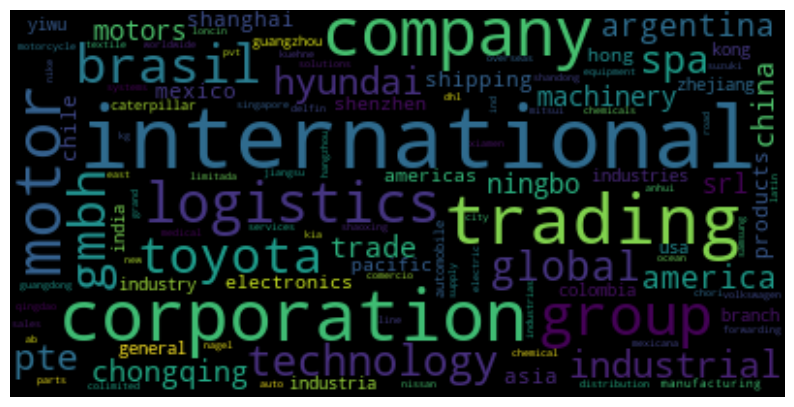

In [77]:
# Se grafica una nube de palabras para visualizar las mas frecuentes
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black').generate_from_frequencies(frequencies=fdist)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 6- Lematización

In [78]:
# Se importa libreria para lematizar, en este caso la libreria NLTK funciona bien para palabras en ingles
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()
sumillas_clean['NOM_RAZONSOCIAL_PE_fdist_lem'] = sumillas_clean['NOM_RAZONSOCIAL_PE_fdist'].apply(wordnet_lem.lemmatize)

In [79]:
# Podemos visualizar la comparacion de casos como funciona la lematizacion
sumillas_clean[sumillas_clean['NOM_RAZONSOCIAL_PE_fdist_lem']!=sumillas_clean['NOM_RAZONSOCIAL_PE_fdist']].head(12)

,NOM_RAZONSOCIAL_PE,NOM_RAZONSOCIAL_PE_token,NOM_RAZONSOCIAL_PE_tokenizado,NOM_RAZONSOCIAL_PE_fdist,NOM_RAZONSOCIAL_PE_fdist_lem
578,watts sa,[watts],watts,watts,watt
2390,all parts inc,[parts],parts,parts,part
2599,all distributions corp,[distributions],distributions,distributions,distribution
3985,mps inc,[mps],mps,mps,mp
5269,watts sa,[watts],watts,watts,watt
5896,arroyos sa,[arroyos],arroyos,arroyos,arroyo
6440,jeans limited,[jeans],jeans,jeans,jean
7238,tenias sa,[tenias],tenias,tenias,tenia
9935,leds sa,[leds],leds,leds,led
10098,all distributions corp,[distributions],distributions,distributions,distribution


## 7-Elaboración el codigo del proveedor

In [80]:
# Se pasa a mayuscula la columna procesada
sumillas_clean['NOM_RAZONSOCIAL_PE_fdist_lem'] = sumillas_clean['NOM_RAZONSOCIAL_PE_fdist_lem'].str.upper()

In [81]:
# Nos quedamos solo con la columna procesada final
sumillas_clean = sumillas_clean.loc[:,['NOM_RAZONSOCIAL_PE_fdist_lem']]
sumillas_clean

,NOM_RAZONSOCIAL_PE_fdist_lem
0,FORESTAL SANTA BLANCA
1,NINGBO SEDUNO
2,CHINABASE NINGBO FOREIGN TRADE
3,HYUNDAI MOTOR COMPANY
4,QUART INTERNATIONAL COMPANY
...,...
2520786,FRUITIST COMPANY
2520787,CARGO
2520788,CARGO
2520789,COMPANIA SIDERURGICA HUACHIPATO


In [82]:
# Se concatena con la tabla inicial
df_DAM_PROVEEDOR = pd.concat([df_DAM_PROVEEDOR, sumillas_clean], axis=1)

In [83]:
# Se agrega el codigo del pais para crear el codigo del proveedor
df_DAM_PROVEEDOR['CODIGO_PROVEEDOR_token']=df_DAM_PROVEEDOR['CODI_PAIS']+df_DAM_PROVEEDOR['NOM_RAZONSOCIAL_PE_fdist_lem']

In [84]:
# Se eliminan espacios vacios en caso queden algunos casos
df_DAM_PROVEEDOR['CODIGO_PROVEEDOR_token'] = df_DAM_PROVEEDOR['CODIGO_PROVEEDOR_token'].str.replace(' ', '')

In [85]:
df_DAM_PROVEEDOR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603678 entries, 0 to 2520790
Data columns (total 7 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   NUM_CORREDOC                  int64 
 1   NUM_SECPARTIC                 int64 
 2   CODI_PAIS                     object
 3   NOM_PROVE                     object
 4   COD_TIPPARTIC                 object
 5   NOM_RAZONSOCIAL_PE_fdist_lem  object
 6   CODIGO_PROVEEDOR_token        object
dtypes: int64(2), object(5)
memory usage: 403.1+ MB


In [86]:
# Cambiamos a tipo string las columnas que pasaran por el procesos de Mineria de Textos
df_DAM_PROVEEDOR['CODIGO_PROVEEDOR_token'] = df_DAM_PROVEEDOR['CODIGO_PROVEEDOR_token'].astype(str)

In [87]:
# Se utiliza como maximo las 20 primeras letras para crear el codigo del proveedor
df_DAM_PROVEEDOR['CODIGO_PROVEEDOR_token']=df_DAM_PROVEEDOR['CODIGO_PROVEEDOR_token'].apply(lambda x: x[0:20])

In [88]:
# Se muestra la tabla procesada
df_DAM_PROVEEDOR

,NUM_CORREDOC,NUM_SECPARTIC,CODI_PAIS,NOM_PROVE,COD_TIPPARTIC,NOM_RAZONSOCIAL_PE_fdist_lem,CODIGO_PROVEEDOR_token
0,5926937,29924516,CL,FORESTAL SANTA BLANCA S.A.,93,FORESTAL SANTA BLANCA,CLFORESTALSANTABLANC
1,5926941,29924532,CN,NINGBO SEDUNO IMP & EXP CO.LTD,93,NINGBO SEDUNO,CNNINGBOSEDUNO
2,5926941,29924536,CN,"CHINA-BASE NINGBO FOREIGN TRADE CO. LTD,",93,CHINABASE NINGBO FOREIGN TRADE,CNCHINABASENINGBOFOR
3,5926934,29924499,KR,HYUNDAI MOTOR COMPANY,93,HYUNDAI MOTOR COMPANY,KRHYUNDAIMOTORCOMPAN
4,5926941,29924540,HK,QUART INTERNATIONAL COMPANY LIMITED,93,QUART INTERNATIONAL COMPANY,HKQUARTINTERNATIONAL
...,...,...,...,...,...,...,...
2520786,39256222,184083514,US,THE FRUITIST COMPANY,SF,FRUITIST COMPANY,USFRUITISTCOMPANY
2520787,39256222,184106778,PA,SEA CARGO SA,SF,CARGO,PACARGO
2520788,39256222,184106698,PA,SEA CARGO SA,SF,CARGO,PACARGO
2520789,39146356,182747300,CL,COMPAÑÍA SIDERURGICA HUACHIPATO S.A.,SF,COMPANIA SIDERURGICA HUACHIPATO,CLCOMPANIASIDERURGIC


In [89]:
# Se muestra su información
df_DAM_PROVEEDOR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603678 entries, 0 to 2520790
Data columns (total 7 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   NUM_CORREDOC                  int64 
 1   NUM_SECPARTIC                 int64 
 2   CODI_PAIS                     object
 3   NOM_PROVE                     object
 4   COD_TIPPARTIC                 object
 5   NOM_RAZONSOCIAL_PE_fdist_lem  object
 6   CODIGO_PROVEEDOR_token        object
dtypes: int64(2), object(5)
memory usage: 403.1+ MB


In [90]:
# Se visualiza una muestra aleatoria
df_DAM_PROVEEDOR.loc[:,['NUM_CORREDOC','NUM_SECPARTIC','CODI_PAIS','NOM_PROVE','CODIGO_PROVEEDOR_token']].sample(12)

,NUM_CORREDOC,NUM_SECPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token
3312747,30836916,146871583,BE,POWER TOOLS DISTRIBUTION N.V.,BEPOWERTOOLSDISTRIBU
1483211,31039443,148707391,PA,"Mondelez Mexico, S. de R.L. de C.V. R.F.C. KFM920615PS8Av. 18 de noviembre 1028, Col. Camino a Manz",PAMONDELEZMEXICORFCN
4070745,40060681,186767487,DK,GRUNDFOS OPERATIONS A/S,DKGRUNDFOSOPERATIONS
2306527,19049344,80480335,MX,NISSAN MEXICANA S.A. DE C.V.,MXNISSANMEXICANA
3740252,36235063,170089193,US,POWERRAIL DISTRIBUTION INC.,USPOWERRAILDISTRIBUT
1436377,10609763,47030692,CN,"GUANGDONG TAYO MOTORCYCLE TECHNOLOGY CO.,LTD.",CNGUANGDONGTAYOMOTOR
3005288,27347083,116700970,BO,INDUSTRIAS CERAMICAS PAZ LTDA,BOINDUSTRIASCERAMICA
1040384,8920617,40318067,CO,MABE COLOMBIA S.A.S,COMABECOLOMBIA
2311323,19193254,81117009,US,"HIGH TECH SUPPLIES, INC.",USHIGHTECHSUPPLIES
2392730,34648378,163787213,US,TRAFIGURA TRADING LLC,USTRAFIGURATRADING


In [91]:
# Se visualiza una muestra aleatoria
df_DAM_PROVEEDOR=df_DAM_PROVEEDOR.loc[:,['NUM_CORREDOC','NUM_SECPARTIC','COD_TIPPARTIC','CODI_PAIS','NOM_PROVE','CODIGO_PROVEEDOR_token']]

In [92]:
#porcentaje de columnas con valores perdidos
(df_DAM_PROVEEDOR.isnull().sum() / len(df_DAM_PROVEEDOR))*100

NUM_CORREDOC              0.0
NUM_SECPARTIC             0.0
COD_TIPPARTIC             0.0
CODI_PAIS                 0.0
NOM_PROVE                 0.0
CODIGO_PROVEEDOR_token    0.0
dtype: float64

In [93]:
# Saving clean sumillas
df_DAM_PROVEEDOR.to_csv("df_DAM_PROVEEDOR_tokenizado.txt", header=True, index=False)

In [94]:
#Guardamos la hora final del proceso y calculamos el tiempo transcurrido de la ejecución
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60) 
print("> Proceso culminado.")
print("> Tiempo transcurrido : {:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

> Proceso culminado.
> Tiempo transcurrido : 00:20:34.01


In [95]:
df_DAM_PROVEEDOR[(df_DAM_PROVEEDOR['NUM_CORREDOC']==36936767) & (df_DAM_PROVEEDOR['NUM_SECPARTIC']==173141533)]

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token
3805828,36936767,173141533,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO


In [96]:
df_DAM_PROVEEDOR[(df_DAM_PROVEEDOR['NUM_CORREDOC']==38850510) & (df_DAM_PROVEEDOR['NUM_SECPARTIC']==181425598)]

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token
3955597,38850510,181425598,93,XX,"HENAN RENFA INUSTRY CO,LTD",XXHENANRENFAINUSTRY


In [97]:
df_DAM_PROVEEDOR[(df_DAM_PROVEEDOR['NOM_PROVE']=='EL ALAMO EXPORT S.A.C.')]

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token
5535,4542552,24559651,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
13383,4552715,24603403,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
17022,4549303,24585957,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
20547,4599695,24788561,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
21756,4591878,24759099,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
...,...,...,...,...,...,...
4074480,40117245,187016156,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
4075318,40124087,187039779,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
4075327,40062320,186775166,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
4076528,40128085,187052575,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO


In [98]:
df_DAM_PROVEEDOR[(df_DAM_PROVEEDOR['NUM_CORREDOC']==36936767) & (df_DAM_PROVEEDOR['NUM_SECPARTIC']==173141533)]

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token
3805828,36936767,173141533,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO


## 8-Prueba de la calidad el codigo del proveedor

In [99]:
# Importamos las librerias necesarias para la manipulación de la data
import pandas as pd
pd.set_option('max_colwidth',150)
import numpy as np
import pickle
import re
import string
import pprint
pp = pprint.PrettyPrinter(compact=True)
import unidecode
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations
from scipy.spatial.distance import cdist

# Importamos la libreria sklearn necesaria para el analisis y modelamiento
from sklearn.feature_extraction.text import CountVectorizer # sirve para contar cuantas veces se repite una palabra en un texto
from sklearn.feature_extraction.text import TfidfVectorizer # tokeniza documentos

# Importamos la libreria nltk necesaria para el analisis de textos
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
regexp = RegexpTokenizer('\w+')

# Solo una unica vez se descargan los stopwords
# nltk.download('stopwords')

#Importamos librerias para procesar fechas
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta
import time

#Guardamos la hora inicial del proceso
start = time.time()

#Creamos un formato de fecha
formato_fecha = "%d/%m/%Y"
FECHA_CARGA=datetime.now().strftime(formato_fecha)

from funpymodeling.exploratory import status

In [100]:
# Se carga la libreria spacy
# ==============================================================================
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [101]:
# df_DAM_PROVEEDOR_tokenizado=pd.read_csv("df_DAM_PROVEEDOR_tokenizado.txt", encoding='utf-8', dtype='object')
df_DAM_PROVEEDOR_tokenizado = df_DAM_PROVEEDOR.copy()

In [102]:
# Se muestran las columnas de la tabla
# ==============================================================================
df_DAM_PROVEEDOR_tokenizado.columns

Index(['NUM_CORREDOC', 'NUM_SECPARTIC', 'COD_TIPPARTIC', 'CODI_PAIS',
       'NOM_PROVE', 'CODIGO_PROVEEDOR_token'],
      dtype='object')

In [103]:
# Se pasa a formato texto
# ==============================================================================
df_DAM_PROVEEDOR_tokenizado['CODIGO_PROVEEDOR_token'] = df_DAM_PROVEEDOR_tokenizado['CODIGO_PROVEEDOR_token'].astype(str)
df_DAM_PROVEEDOR_tokenizado['CODI_PAIS'] = df_DAM_PROVEEDOR_tokenizado['CODI_PAIS'].astype(str)

In [104]:
# Se ordena la tabla
# ==============================================================================
df_DAM_PROVEEDOR_tokenizado_order=pd.DataFrame(df_DAM_PROVEEDOR_tokenizado.sort_values(by="CODIGO_PROVEEDOR_token")).reset_index()
df_DAM_PROVEEDOR_tokenizado_order.shape

(6603678, 7)

In [105]:
#porcentaje de columnas con valores perdidos
((df_DAM_PROVEEDOR_tokenizado_order.isnull().sum() / len(df_DAM_PROVEEDOR_tokenizado_order))*100).sort_values(ascending = False)

index                     0.0
NUM_CORREDOC              0.0
NUM_SECPARTIC             0.0
COD_TIPPARTIC             0.0
CODI_PAIS                 0.0
NOM_PROVE                 0.0
CODIGO_PROVEEDOR_token    0.0
dtype: float64

In [106]:
# Se elimina los casos que tengan al menos un caso vacio
# ==============================================================================
# df_DAM_PROVEEDOR_tokenizado_order = df_DAM_PROVEEDOR_tokenizado_order.dropna()
df_DAM_PROVEEDOR_tokenizado_order.shape

(6603678, 7)

In [107]:
# Se muestra la tabla
# ==============================================================================
df_DAM_PROVEEDOR_tokenizado_order.sample(6)

,index,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token
2044465,1866355,9403789,42330444,SF,CN,"KUEHNE & NAGEL LTD GUANGZHOU BRANCH20-21/F CENTER PLAZA NORTH TOWER159 LINHEXI ROAD, TIANHEGUANGZHOU 510620, PR CHINAAGENT OF BLUE ANCHOR LINE",CNKUEHNENAGELGUANGZH
5115398,273847,5526458,28465625,93,NZ,FONTERRA INGREDIENTS LIMITED,NZFONTERRAINGREDIENT
5861211,232750,5373656,27911855,93,US,"EAIR, LLC",USEAIR
5356430,534747,6680634,32440726,93,SG,3M INNOVATION SINGAPORE PTE LTD.,SGINNOVATIONSINGAPOR
705435,2230977,18270266,76840102,93,CA,FONNAULT TRONLEGEND TRADING,CAFONNAULTTRONLEGEND
2245133,4064410,39949879,186276148,93,CN,PARKSON C N LIM ITED CO,CNPARKSONLIMITED


In [108]:
df=df_DAM_PROVEEDOR_tokenizado_order.drop_duplicates()

In [109]:
# Se resetean los indices
# ==============================================================================
df.reset_index(inplace=True, drop=True)

In [110]:
# Información de la tabla
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603678 entries, 0 to 6603677
Data columns (total 7 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   index                   int64 
 1   NUM_CORREDOC            int64 
 2   NUM_SECPARTIC           int64 
 3   COD_TIPPARTIC           object
 4   CODI_PAIS               object
 5   NOM_PROVE               object
 6   CODIGO_PROVEEDOR_token  object
dtypes: int64(3), object(4)
memory usage: 352.7+ MB


In [111]:
# Se carga la libreria jarowinkler
# ==============================================================================
from jarowinkler import *

In [112]:
import textdistance

In [113]:
# Crear una columna para almacenar la similitud
df['Similitud'] = 0.0

In [114]:
# Calcular la similitud entre las filas consecutivas
for i in range(len(df) - 1):
    current_row = df.loc[i, 'CODIGO_PROVEEDOR_token']
    next_row = df.loc[i + 1, 'CODIGO_PROVEEDOR_token']
    similarity = textdistance.jaro_winkler(current_row, next_row)
    df.loc[i, 'Similitud'] = similarity

In [115]:
df.head(10)

,index,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token,Similitud
0,437261,6192690,30874913,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
1,2869713,25741330,109706928,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
2,2869538,25693507,109485416,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
3,3988196,39177460,182876609,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
4,3438502,32314510,153305693,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
5,3438742,32308625,153275724,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
6,378128,5929341,29936028,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
7,3438979,32307612,153272045,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
8,3438998,32308603,153275640,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0
9,2309308,19042952,80456295,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0


In [116]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,index,0,0.0,2,3.028615e-07,4082887,int64
1,NUM_CORREDOC,0,0.0,0,0.000000e+00,3775120,int64
2,NUM_SECPARTIC,0,0.0,0,0.000000e+00,6603678,int64
3,COD_TIPPARTIC,0,0.0,0,0.000000e+00,2,object
4,CODI_PAIS,0,0.0,0,0.000000e+00,202,object
5,NOM_PROVE,0,0.0,0,0.000000e+00,689358,object
6,CODIGO_PROVEEDOR_token,0,0.0,0,0.000000e+00,369653,object
7,Similitud,0,0.0,4,6.057231e-07,2730,float64


In [117]:
df[(df["Similitud"] >= 0.92) & (df["Similitud"] < 1)]

,index,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token,Similitud
2123,1330042,9969724,44570070,93,1B,DANIEL CHACARA EIRL,1BDANIELCHACARAEIRL,0.948947
2332,982670,8816111,39893475,93,1B,IMPORTACIONES & EXPORTACIONES EDYLIZ SOCIEDAD ANONIMA CERRAD,1BIMPORTACIONESEXPOR,0.920000
2753,3050533,27788573,118657578,93,AD,PIONEERS PHARMAVET S.L.,ADPIONEERSPHARMAVET,0.990000
2868,3587855,34209764,161458070,93,AD,"PIONEERS PHARMAVET S.L. (P.S.P.,S.L.)",ADPIONEERSPHARMAVETP,0.980000
2949,3220378,29854610,141821880,93,AE,ABDULLA & FAIDHULLA TRADING LLC,AEABDULLAFAIDHULLATR,0.958947
...,...,...,...,...,...,...,...,...
6603374,3688003,35458149,166836682,93,ZA,UCL COMPANY (PTY) LTD,ZAUCLCOMPANYPTY,0.966667
6603387,2228050,18260266,76794283,93,ZA,UNION SWISS,ZAUNIONSWISS,0.960000
6603419,2558363,21964195,93352524,93,ZA,VIBRAMECH,ZAVIBRAMECH,0.957143
6603601,1064164,8997674,40633930,93,ZA,ZINCHEM A DIVISION OF ZIMCO GROUP (PTY) LTD,ZAZINCHEMDIVISIONZIM,0.980000


In [118]:
# Crear una columna para almacenar la similitud, lo lleno con el primer codigo de la tabla
df['CODIGO_PROVEEDOR_token_02'] = df.iloc[0,6]
df['CODIGO_PROVEEDOR_token_02']

0          1BALAMO
1          1BALAMO
2          1BALAMO
3          1BALAMO
4          1BALAMO
            ...   
6603673    1BALAMO
6603674    1BALAMO
6603675    1BALAMO
6603676    1BALAMO
6603677    1BALAMO
Name: CODIGO_PROVEEDOR_token_02, Length: 6603678, dtype: object

In [119]:
# Se halla los nuevos valores
# ==============================================================================

for i in range(df.shape[0]):
    if i+1 < len(df):
        if df.loc[i,'Similitud']  >= 0.92:
            df.loc[i+1,'CODIGO_PROVEEDOR_token_02'] = df.loc[i,'CODIGO_PROVEEDOR_token']
            if df.loc[i+1,'CODIGO_PROVEEDOR_token_02'] != df.loc[i,'CODIGO_PROVEEDOR_token_02']:
                     df.loc[i+1,'CODIGO_PROVEEDOR_token_02'] = df.loc[i,'CODIGO_PROVEEDOR_token_02']
        else:
            df.loc[i+1,'CODIGO_PROVEEDOR_token_02'] = df.loc[i+1,'CODIGO_PROVEEDOR_token']
                  

In [120]:
df.sample(6)

,index,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token,Similitud,CODIGO_PROVEEDOR_token_02
6328677,2200092,15708984,66825547,SF,US,RAMIREZ MACHINERY EXPORT,USRAMIREZMACHINERY,1.0,USRAMIREZMACHINERY
6385724,2858801,25563007,108905665,93,US,"SIEMENS HEALTHCARE DIAGNOSTICS (HEALTHINEERS, DIAGNOSTICS)",USSIEMENSHEALTHCARED,1.0,USSIEMENSHEALTHCARED
4104842,1766347,13071097,54801501,93,IN,ABB POWER PRODUCTS AND SYSTEMS INDIA LTD,INABBPOWERPRODUCTSSY,1.0,INABBPOWERPRODCUTSSY
684532,2869555,25733912,109668697,93,BR,WEKO AMERICA LATINA EQUIPAMENTOS INDUSTRIAIS LTDA,BRWEKOAMERICALATINAE,1.0,BRWEKOAMERICALATINAE
1680066,605014,8409041,38664842,SF,CN,"GOLD HUA SHENG PAPER SUZHOU INDUSTRIAL PARK CO., LTD",CNGOLDHUASHENGPAPERS,1.0,CNGOLDHUASHENGPAPER
3148594,2929881,26458666,112826776,93,CO,MONTRE S.A.S,COMONTRE,1.0,COMONTRE


In [121]:
df['CODE_PROVEED'] = df['CODIGO_PROVEEDOR_token_02'] 

In [122]:
df.sample(6)

,index,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODIGO_PROVEEDOR_token,Similitud,CODIGO_PROVEEDOR_token_02,CODE_PROVEED
1305450,3167497,29177007,138380134,93,CN,CHANGAN INTERNATIONAL CORPORATION,CNCHANGANINTERNATION,1.0,CNCHANGANINTERNATION,CNCHANGANINTERNATION
1893588,1914358,9802803,44290174,SF,CN,HOMY CASA LIMITED,CNHOMYCASA,1.0,CNHOMYCASA,CNHOMYCASA
4728723,1113948,26889704,115737801,SF,KR,PT. BADJA BARU,KRPTBADJABARU,1.0,KRPTBADJABARU,KRPTBADJABARU
6050346,269824,5579456,28667548,93,US,HYSTER COMPANY,USHYSTERCOMPANY,1.0,USHYSTERCOMPANY,USHYSTERCOMPANY
473546,2317031,19136922,80845582,93,BR,GERALDISCOS COM.IND. E REPRES. DE CORT. LTDA.,BRGERALDISCOSCOMINDR,1.0,BRGERALDISCOSACOMAIN,BRGERALDISCOSACOMAIN
1261070,958068,22121279,94575678,SF,CN,BON VOYAGE LOGISTICS INC.,CNBONVOYAGELOGISTICS,1.0,CNBONVOYAGELOGISTIC,CNBONVOYAGELOGISTIC


In [123]:
df2 = df.loc[:,['NUM_CORREDOC','NUM_SECPARTIC','COD_TIPPARTIC','CODI_PAIS','NOM_PROVE','CODE_PROVEED', 'Similitud']]

In [124]:
df2.sample(10)

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODE_PROVEED,Similitud
3884628,28662099,128403264,93,HK,FLEX - BOX NEW CONTAINERS,HKFLEXBOXNEWCONTAINE,1.0
4894832,5977611,30118404,93,MX,KIA MOTORS MEXICO S.A. DE C.V.,MXKIAMOTORS,1.0
4589841,4643110,24969373,93,KR,GMB KOREA CORPORATION,KRGMBKOREACORPORATIO,1.0
2344391,16048094,66377119,93,CN,"SAIC GM WULING AUTOMOBILE CO.,LTD",CNSAICGMWULINGAUTOMO,1.0
5174213,26107248,111511836,SF,PA,"Helmsman Freight Solutions, LLC",PAHELMSMANFREIGHTJEU,1.0
1124109,6347702,31401552,93,CL,TUBOS Y PLASTICOS TIGRE-ADS DE CHILE LIMITADA,CLTUBOSPLASTICOSTACH,1.0
5851619,10474842,46552663,93,US,THE DOW CHEMICAL COMPANY,USDOWCHEMICAL,1.0
4138456,7784027,36126879,SF,IN,GRASIM INDUSTRIES LIMITED,INGRASIMINDUSTRIES,1.0
2870152,6386081,31546848,93,CN,YIWU XINHE TRADING CO LIMITED,CNYIWUXINHETRADE,1.0
5920649,31153705,148280746,93,US,"FISHER SCIENTIFIC CO, LLC",USFISHERSCIENTIF,1.0


In [125]:
df2[(df2['NUM_CORREDOC']==36936767) & (df2['NUM_SECPARTIC']==173141533)]

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODE_PROVEED,Similitud
833,36936767,173141533,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.0


In [126]:
df2[(df2['NUM_CORREDOC']==38850510) & (df2['NUM_SECPARTIC']==181425598)]

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODE_PROVEED,Similitud
6599541,38850510,181425598,93,XX,"HENAN RENFA INUSTRY CO,LTD",XXHENANRENFAINUSTRY,0.542105


In [127]:
df2[(df2['NOM_PROVE']=='EL ALAMO EXPORT S.A.C.')]

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODE_PROVEED,Similitud
0,6192690,30874913,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.000000
1,25741330,109706928,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.000000
2,25693507,109485416,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.000000
3,39177460,182876609,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.000000
4,32314510,153305693,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.000000
...,...,...,...,...,...,...,...
5259343,38558387,180147120,93,PE,EL ALAMO EXPORT S.A.C.,PEALAMO,1.000000
5259344,38527559,180015217,93,PE,EL ALAMO EXPORT S.A.C.,PEALAMO,1.000000
5259345,7233419,34245291,93,PE,EL ALAMO EXPORT S.A.C.,PEALAMO,1.000000
5259346,7230280,34235219,93,PE,EL ALAMO EXPORT S.A.C.,PEALAMO,1.000000


In [128]:
# Saving data final
#df.to_csv("CODIGO_EMBARCADOR.csv", header=True, index=False)

#df2.to_csv("CODIGO_ALL_PARTICIPANTE_93.csv", header=True, index=False)

df2.to_csv("CODIGO_PROVEEDOR_EMBARCADOR.csv", header=True, index=False)

In [129]:
df.shape

(6603678, 10)

In [130]:
df3 = df2.drop_duplicates(['CODI_PAIS','NOM_PROVE', 'CODE_PROVEED'], keep='first')

In [131]:
df3 = df3.drop_duplicates()

In [132]:
df3

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODE_PROVEED,Similitud
0,6192690,30874913,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO,1.000000
1438,13373943,55753425,93,1B,CHIANG TACNA S.A.C.,1BCHIANGTACNA,1.000000
1456,26461203,112834341,93,1B,CHYFLY SHOES S.A.C.,1BCHYFLYSHOES,1.000000
2021,11636774,50639771,93,1B,CORPORACION MAUC SOCIEDAD ANONIMA CERRADA,1BCORPORACIONMAUCSOC,1.000000
2073,18999680,80218127,93,1B,CORPORACION PERUANA DEL ACERO S.A.C.,1BCORPORACIONPERUANA,1.000000
...,...,...,...,...,...,...,...
6603662,11078731,48903200,93,ZM,MYLAN LABORATORIES LIMITED,ZMMYLANLABORATORIES,0.540389
6603663,20735468,87995076,93,ZM,RODNEY LUNDA,ZMRODNEYLUNDA,1.000000
6603665,38483934,179791326,93,ZM,RODNEY LUNDA GENERAL DEALERS LTD,ZMRODNEYLUNDA,1.000000
6603675,8922855,40325565,93,ZM,SULWATI EMPIRE SPARES LIMITED,ZMSULWATIEMPIRESPARE,0.533333


In [133]:
df3 = df3.iloc[:,0:6]

In [134]:
df3

,NUM_CORREDOC,NUM_SECPARTIC,COD_TIPPARTIC,CODI_PAIS,NOM_PROVE,CODE_PROVEED
0,6192690,30874913,93,1B,EL ALAMO EXPORT S.A.C.,1BALAMO
1438,13373943,55753425,93,1B,CHIANG TACNA S.A.C.,1BCHIANGTACNA
1456,26461203,112834341,93,1B,CHYFLY SHOES S.A.C.,1BCHYFLYSHOES
2021,11636774,50639771,93,1B,CORPORACION MAUC SOCIEDAD ANONIMA CERRADA,1BCORPORACIONMAUCSOC
2073,18999680,80218127,93,1B,CORPORACION PERUANA DEL ACERO S.A.C.,1BCORPORACIONPERUANA
...,...,...,...,...,...,...
6603662,11078731,48903200,93,ZM,MYLAN LABORATORIES LIMITED,ZMMYLANLABORATORIES
6603663,20735468,87995076,93,ZM,RODNEY LUNDA,ZMRODNEYLUNDA
6603665,38483934,179791326,93,ZM,RODNEY LUNDA GENERAL DEALERS LTD,ZMRODNEYLUNDA
6603675,8922855,40325565,93,ZM,SULWATI EMPIRE SPARES LIMITED,ZMSULWATIEMPIRESPARE


In [177]:
# Saving data final
#df.to_csv("CODIGO_EMBARCADOR.csv", header=True, index=False)

#df2.to_csv("CODIGO_ALL_PARTICIPANTE_93.csv", header=True, index=False)

df3.to_csv("CODIGO_PROVEEDOR_EMBARCADOR_unicos.csv", header=True, index=False)